# Singn_Language_Detection_Using_CNN

# **Importing Libraries**

*   **Numpy and Pandas**
*   **Matplotlib and Seaborn**
*   **TensorFlow and Keras**
*   **Scikit-learn**












In [247]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
# TensorFlow and Keras for building and training the neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

In [249]:
# Sklearn for performance metrics and preprocessing
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelBinarizer

In [250]:
# Suppress the specific warning
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='tensorflow.keras.preprocessing.image')

# **Exploring and Visualizing Dataset**
*   Loading and Checking Data
*   Visualizing Class Distribution






In [251]:
# Loading and Checking Train Data
train_data_reference = pd.read_csv('/content/sign_mnist_train.csv')
print('train_data_referenceshape :', train_data_reference.shape)
print('Null_Values :' ,train_data_reference.isnull().sum().sum()) # To check null values in the data set
train_data_reference.info()

train_data_referenceshape : (27455, 785)
Null_Values : 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [252]:
train_data_reference.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [253]:
# Loading and Checking Test Data
test_data_reference = pd.read_csv('/content/sign_mnist_test.csv')
print('test_data_reference_shape :', test_data_reference.shape)
print('Null_Values :' ,test_data_reference.isnull().sum().sum()) # To check null values in the data set
test_data_reference.info()

test_data_reference_shape : (7172, 785)
Null_Values : 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [254]:
test_data_reference.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


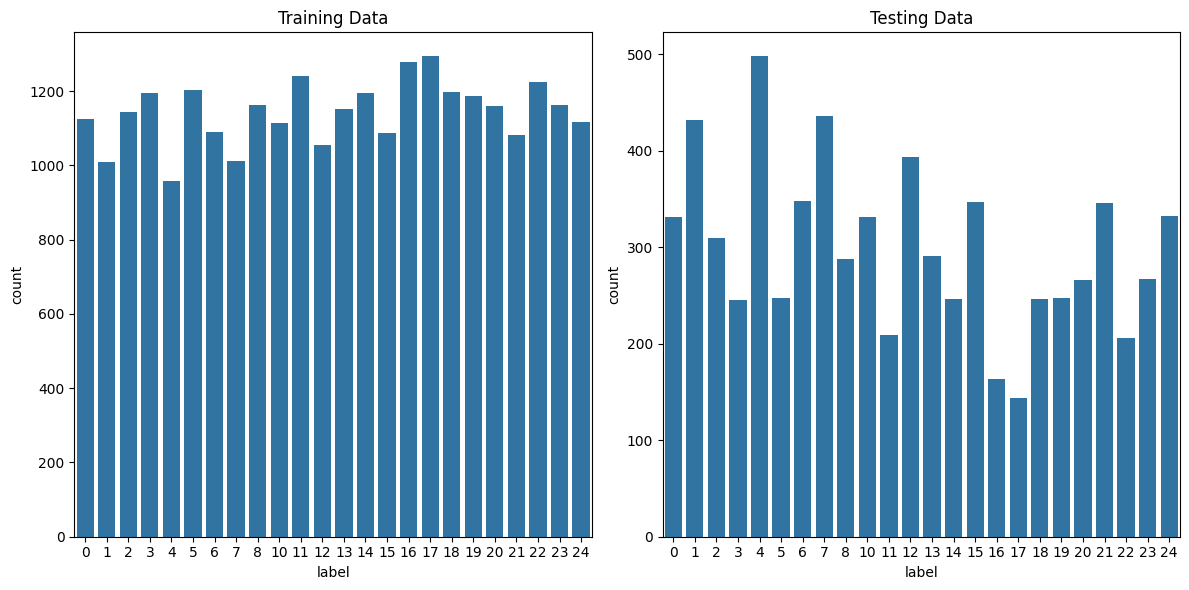

In [255]:
#Visualizing Train and Test Data
#Two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for training data
sns.countplot(data=train_data_reference, x="label", ax=axs[0])
axs[0].set_title('Training Data')

# Plot for testing data
sns.countplot(data=test_data_reference, x="label", ax=axs[1])
axs[1].set_title('Testing Data')

# Visualizinf the data
plt.tight_layout()
plt.show()

# **Loading and Preprocessing the Dataset**


In [256]:
# Function to load data from CSV
def load_csv_data(csv_file):
    data = pd.read_csv(csv_file)
    labels = data.iloc[:, 0]  # Extracting the Lables
    images = data.iloc[:, 1:].values  # Extracting the Pixels
    images = images.reshape(-1, 28, 28, 1) # Reshape to 28x28
    return images, labels

In [257]:
# Load training and testing data
train_images, train_labels = load_csv_data('/content/sign_mnist_train.csv')
test_images, test_labels = load_csv_data('/content/sign_mnist_test.csv')

In [258]:
# Normalize the images with maximum pixel value 255.0
train_images = train_images / 255.0
test_images = test_images / 255.0

# Label Encoding using LabelBinarizer()
label_binarizer = LabelBinarizer()
train_labels = label_binarizer.fit_transform(train_labels)
test_labels = label_binarizer.transform(test_labels)

In [259]:
print("train_image_shape :" ,train_images.shape)
print("train_image_datatype :" , train_images.dtype)
print("train_label_shape :" ,train_labels.shape)
print("train_label_datatype :" , train_labels.dtype)
print("test_image_shape :" ,test_images.shape)
print("test_image_datatype :" , test_images.dtype)
print("test_label_shape :" ,test_labels.shape)
print("test_label_datatype :" , test_labels.dtype)

train_image_shape : (27455, 28, 28, 1)
train_image_datatype : float64
train_label_shape : (27455, 24)
train_label_datatype : int64
test_image_shape : (7172, 28, 28, 1)
test_image_datatype : float64
test_label_shape : (7172, 24)
test_label_datatype : int64


# **Data Augmentation**

In [260]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False
)

# **Convolutional Neural Network Model Architecture**

**Model Architecture:**
*   Convolutional Layers
*   Normalization and Pooling
*   Flattening and Dense Layers
*   Batch Normalization and Dropout
*   Output Layer

In [261]:
# Model Building
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(24, activation='softmax')
])

# **Compiling the Convolutional Neural Network Model**

In [262]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [263]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_44 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_44 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_45 (Ba  (None, 14, 14, 64)      

# **Custom Callback for F1 Score**


In [264]:
# Custom callback to calculate F1 score for each epoch
class F1ScoreCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        predictions = model.predict(test_images)
        predicted_labels = np.argmax(predictions, axis=1)
        true_labels = np.argmax(test_labels, axis=1)
        f1 = f1_score(true_labels, predicted_labels, average='weighted')
        print(f"Epoch {epoch+1} - F1 Score: {f1:.2f}")

# **Training the Convolutional Neural Network Model**

In [265]:
# Model Training
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    validation_data=(test_images, test_labels),
                    epochs=10,
                    callbacks=[F1ScoreCallback()])

Epoch 1/10
225/225 [==============================] - 4s 19ms/step
Epoch 1 - F1 Score: 0.46
429/429 [==============================] - 89s 200ms/step - loss: 3.7189 - accuracy: 0.5723 - val_loss: 2.4184 - val_accuracy: 0.4794
Epoch 2/10
225/225 [==============================] - 4s 19ms/step
Epoch 2 - F1 Score: 0.85
429/429 [==============================] - 82s 192ms/step - loss: 0.9602 - accuracy: 0.8758 - val_loss: 0.8266 - val_accuracy: 0.8479
Epoch 3/10
225/225 [==============================] - 4s 19ms/step
Epoch 3 - F1 Score: 0.98
429/429 [==============================] - 89s 208ms/step - loss: 0.5982 - accuracy: 0.9246 - val_loss: 0.4487 - val_accuracy: 0.9755
Epoch 4/10
225/225 [==============================] - 5s 20ms/step
Epoch 4 - F1 Score: 0.95
429/429 [==============================] - 84s 196ms/step - loss: 0.5266 - accuracy: 0.9404 - val_loss: 0.4737 - val_accuracy: 0.9568
Epoch 5/10
225/225 [==============================] - 4s 18ms/step
Epoch 5 - F1 Score: 0.97
429/

# **Evaluating the Trained Convolutional Neural Network Model**

In [266]:
# Model Evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

225/225 [==============================] - 4s 19ms/step - loss: 0.3173 - accuracy: 0.9940
Test accuracy: 0.994004487991333


# **Classification Report and Confusion Matrix for Model Evaluation**




In [267]:
# Classification Report and Confusion Matrix
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

225/225 [==============================] - 5s 24ms/step


In [268]:
# Convert label binarizer classes to list of strings
target_names = [str(class_label) for class_label in label_binarizer.classes_]

In [269]:
print(classification_report(true_labels, predicted_labels, target_names=target_names))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       0.97      1.00      0.99       498
           5       1.00      1.00      1.00       247
           6       1.00      1.00      1.00       348
           7       1.00      1.00      1.00       436
           8       1.00      0.99      1.00       288
          10       1.00      1.00      1.00       331
          11       1.00      1.00      1.00       209
          12       1.00      0.96      0.98       394
          13       1.00      1.00      1.00       291
          14       1.00      1.00      1.00       246
          15       1.00      1.00      1.00       347
          16       1.00      1.00      1.00       164
          17       1.00      1.00      1.00       144
          18       1.00    

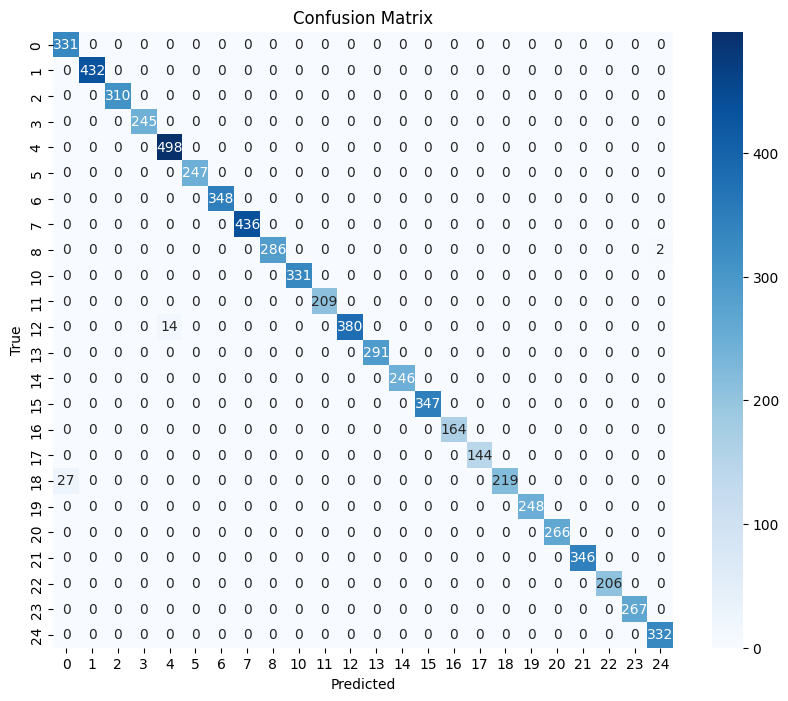

In [270]:
#Confusion_Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_binarizer.classes_, yticklabels=label_binarizer.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [271]:
def plot_metrics(history):
    plt.figure(figsize=(12, 5))

    # Plotting model accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting model loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

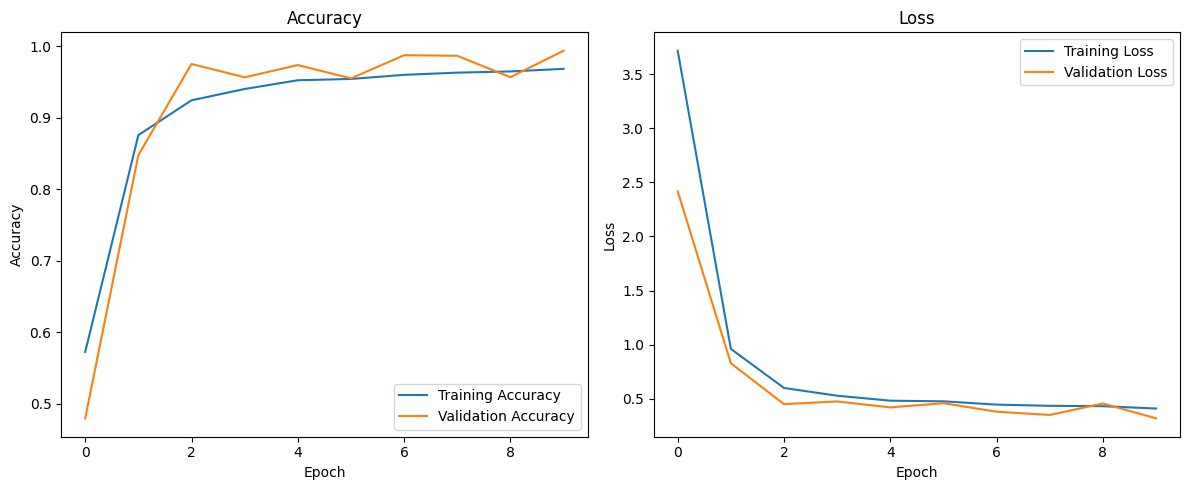

In [272]:
plot_metrics(history)

# **Model Saving**

In [273]:
# Save the model
model.save('Sign_Language_Model_B64_E10_Iter05.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
